## bernoulli mixture EM

Here I apply EM algorithm to find parameters of Bernoulli mixture distribution. 

Bernoulli mixture distribution $$p(x|\mu) = \sum_{k=1}^{K} \pi_k \sum_{d=1}^{D} \mu_{kd}^{x_{kd}} (1-\mu_{kd})^{1-x_{kd}}$$

The digits dataset was used. Each digit is 8x8 matrix, each cell denotes intensivity of grey. Since multivariate bernoulli is just set of regular bernoullis and the domain is {0, 1}, so each cell stands for one random value and we need to make it 0 or 1, thats why it was normalized by max value and rounded.

So, consider only one picture. It has 64 cells each drawn from some Bernoulli distribution, consequently both $x$ and $\mu$ have shape (1, 64). The whole number of digits is 10, so $\pi$ consists 10 coeffs

Task: to cluster the dataset so that each cluster stands for a digit, i.e find components of the mixture.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
xy = np.rint(digits.images/16+0.1)
xy = xy.reshape(len(xy), 64)

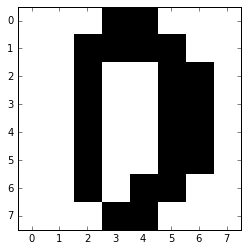

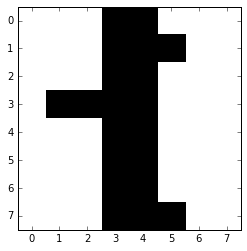

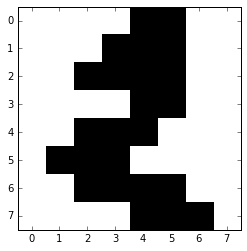

In [4]:
for row in xy[:3]:
    a = int(np.sqrt(len(row)))
    plt.imshow(row.reshape(a, a), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [5]:
def pdf(x, mu): #  pdf
    mu = np.array(mu)
    x = np.array(x)
    return ((mu**x*(1-mu)**(1-x))).prod()

In [6]:
def calc_gamma(x, pi, mu): #  p(z|x_i)
    gamma = np.zeros(len(pi))
    for k in range(len(pi)):
        gamma[k] = pi[k] * pdf(x, mu[k])
    return gamma/sum(gamma)

Initial values:

In [7]:
pi = [0.1]*10
mu = [[(0.75 - 0.25)*np.random.sample()+0.25 for i in range(64)] for j in range(len(pi))]

EM 

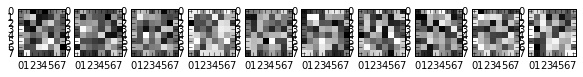

[ 0.00862675  0.28663267  0.04694146  0.12190365  0.02698692  0.00263412
  0.27423967  0.00060728  0.10123886  0.13018862]


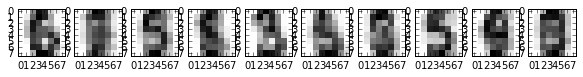

[ 0.05816722  0.23780165  0.05810841  0.13447151  0.10479153  0.01649924
  0.15272308  0.00163615  0.12527283  0.11052838]


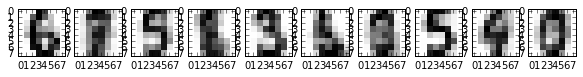

[ 0.08846344  0.23185395  0.06497308  0.12230325  0.12254134  0.02009156
  0.09836835  0.00804538  0.13515449  0.10820515]


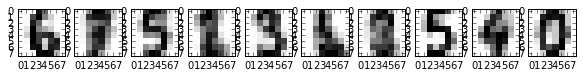

[ 0.09308023  0.22236856  0.06283247  0.11555651  0.12822255  0.01953873
  0.10274592  0.01356032  0.13730739  0.10478732]


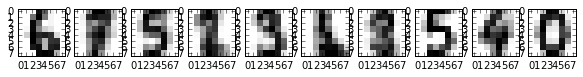

[ 0.09467066  0.21388835  0.0639472   0.11294831  0.13550373  0.01863003
  0.11410491  0.01451625  0.13338183  0.09840873]


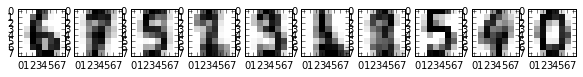

[ 0.09509929  0.2084177   0.06417455  0.11077148  0.14076551  0.01823365
  0.12561926  0.01447237  0.12567534  0.09677086]


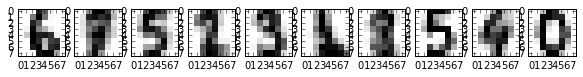

[ 0.09532365  0.20579381  0.06260697  0.10855517  0.14478202  0.01789559
  0.13554711  0.0145031   0.11858374  0.09640883]


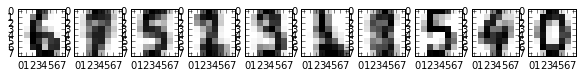

[ 0.09552603  0.2034356   0.06048327  0.10772817  0.14873816  0.01755156
  0.14300848  0.01452088  0.11277336  0.0962345 ]


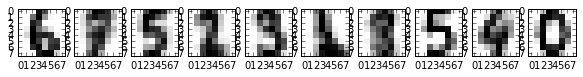

[ 0.0958821   0.19855203  0.05925529  0.10969555  0.15290162  0.01732655
  0.14740328  0.01434911  0.10848185  0.09615263]


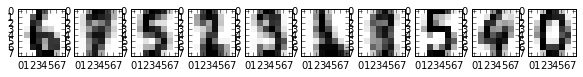

[ 0.09637266  0.19215595  0.05908059  0.11229019  0.15715018  0.01695014
  0.15046334  0.0144936   0.10488768  0.09615567]


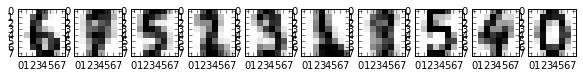

[ 0.09666053  0.18540129  0.05945063  0.11506942  0.16130827  0.01667851
  0.15278567  0.01521015  0.10137287  0.09606266]


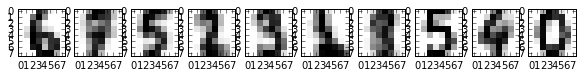

[ 0.0968207   0.17835159  0.06151294  0.11788888  0.16504257  0.01612975
  0.15362584  0.01597884  0.09868938  0.09595951]


In [8]:
# TODO: add convergence condition
n_iter = 12
for step in range(n_iter):
    # E step
    nk = np.zeros(np.array(pi).shape)
    gammas = []
    for i in range(len(xy)):
        nk += calc_gamma(xy[i], pi, mu)
        gammas.append(calc_gamma(xy[i], pi, mu))
    gammas = np.transpose(gammas)
    # ------------
    plt.figure(figsize=(10, 10))
    for k in range(len(pi)):
        digit = np.mean([[np.random.binomial(1, mu[k][i]) for i in range(64)] for j in range(100)], axis=0)
        a = int(np.sqrt(len(digit)))
        plt.subplot(1, 10, k+1)
        plt.imshow(digit.reshape(a, a), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    # M step
    for k in range(len(pi)):
        mu_new = np.dot(gammas[k], xy)
        mu[k] = mu_new/nk[k]
    
    pi = nk/len(xy)
    print pi
    # -----------

Yay! Compare with k-means:

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, max_iter=100)
xy = digits.images/16
xy = xy.reshape(len(xy), 64)
km.fit(xy)

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

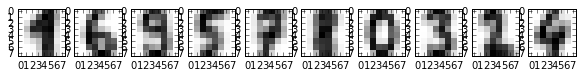

In [10]:
plt.figure(figsize=(10, 10))
for k in range(10):
    digit = km.cluster_centers_[k]
    a = int(np.sqrt(len(digit)))
    plt.subplot(1, 10, k+1)
    plt.imshow(digit.reshape(a, a), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()